## 🩺 Breast Cancer Classification – Machine Learning Project

### 📌 Project Overview

This project aims to build a machine learning model that classifies breast tumors as:

* Malignant (M) – cancerous
* Benign (B) – non-cancerous

The dataset used is the Breast Cancer Wisconsin (Diagnostic) Dataset, which contains 569 samples with 30 numerical features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

🎯 The goal is to develop a reliable classification model with high sensitivity to detect malignant tumors.

💡 Features describe characteristics of tumors such as: radius, texture, perimeter, area, smoothness, concavity, symmetry, fractal dimension

### 📂 Load & Inspect the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/vasiagalanopoulou/Desktop/breast-cancer-classification-project/dataset/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 🧹 Data Cleaning 

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
df.duplicated().sum()

0

### 🔎 EDA

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [11]:
df['diagnosis'] 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

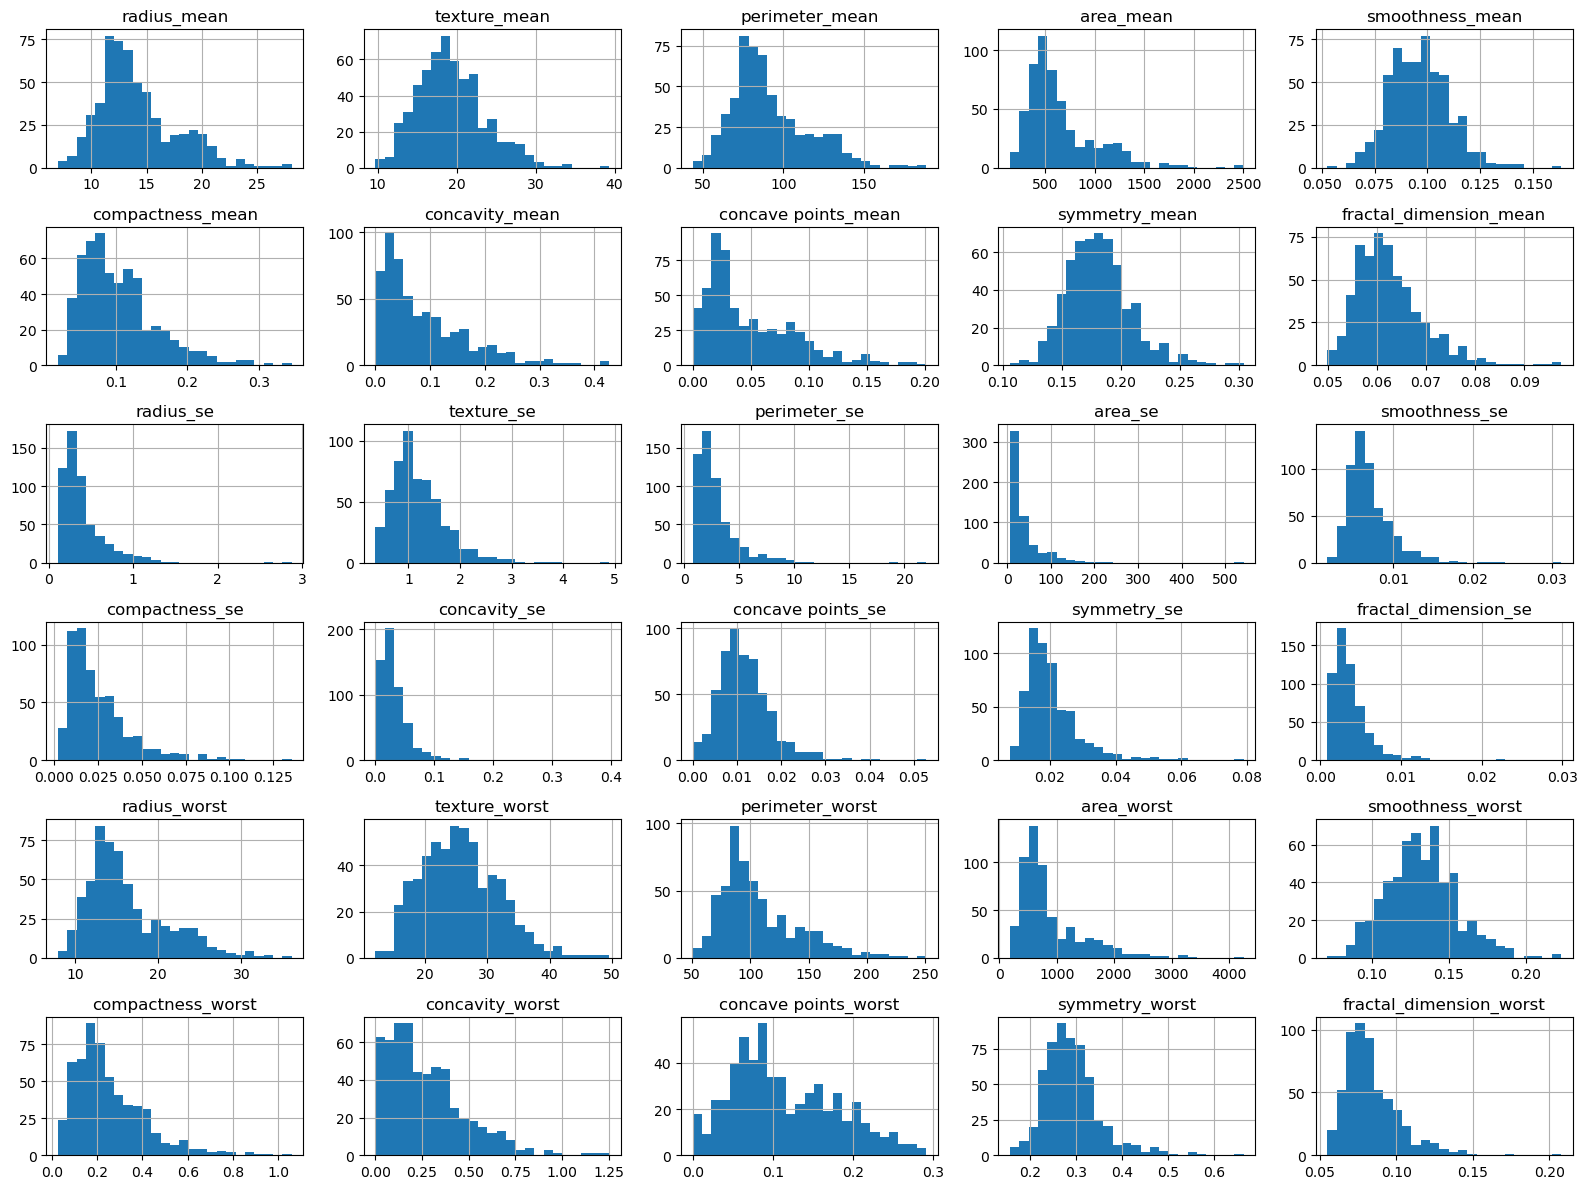

In [12]:
num_cols = df.select_dtypes(include="number").columns.drop('diagnosis', errors="ignore")
df[num_cols].hist(figsize=(16, 12), bins=25)
plt.tight_layout()
plt.show()

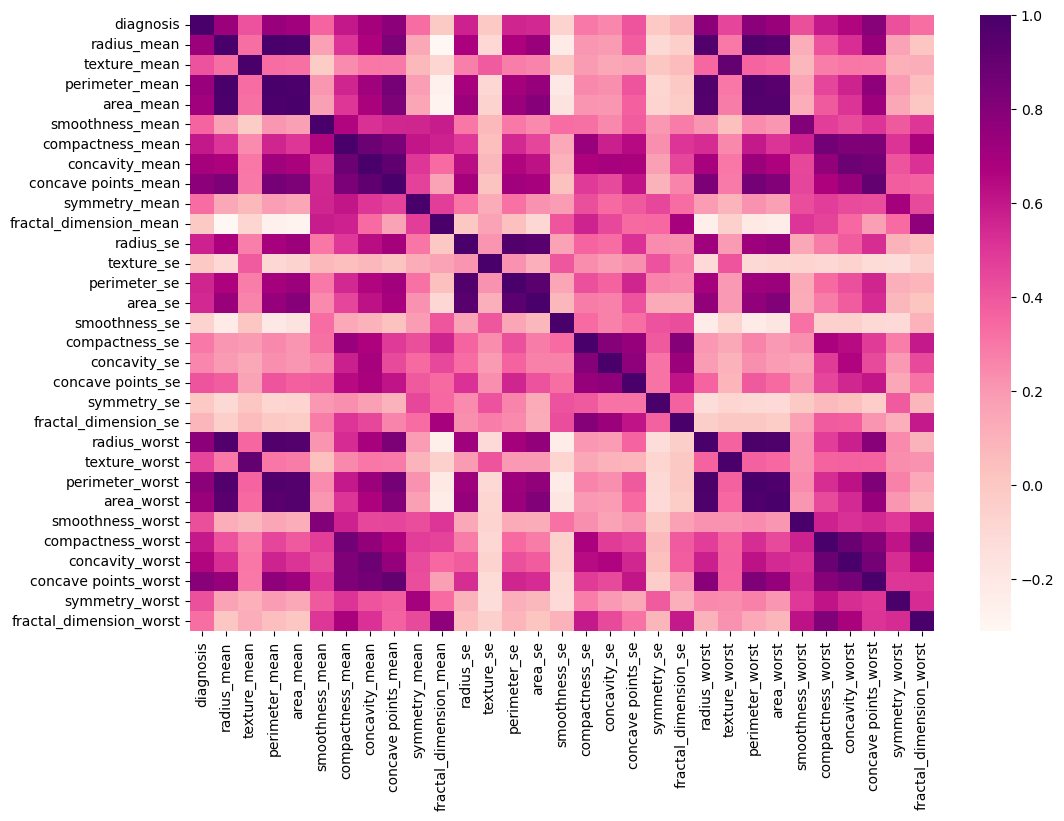

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="RdPu")  
plt.show()

Strong correlations between:

* mean radius ↔ worst radius
* mean area ↔ worst area
* mean perimeter ↔ worst perimeter
* radius ↔ perimeter ↔ area

The correlation heatmap shows strong multicollinearity among size-related features (radius, area, perimeter). This justifies applying PCA to reduce redundancy and capture the main variance directions.

### 🤖 Develop Baseline Models

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [15]:
results = []

In [16]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# MODEL 1: Baseline Logistic Regression

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

log_reg.fit(X_train, y_train)
pred_lr = log_reg.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", round(accuracy_score(y_test, pred_lr), 4))
print(classification_report(y_test, pred_lr, digits=4))

results.append({
    "model": "Baseline Logistic Regression",
    "accuracy": accuracy_score(y_test, pred_lr),
    "precision": precision_score(y_test, pred_lr),
    "recall": recall_score(y_test, pred_lr, pos_label=1)
})

# =========================
# MODEL 2: Random Forest
# =========================
rf = RandomForestClassifier(n_estimators=300, random_state=42)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print("Accuracy:", round(accuracy_score(y_test, pred_rf), 4))
print(classification_report(y_test, pred_rf, digits=4))

results.append({
    "model": "Baseline Random Forest Regression",
    "accuracy": accuracy_score(y_test, pred_rf),
    "precision": precision_score(y_test, pred_rf),
    "recall": recall_score(y_test, pred_rf, pos_label=1)
})

# =========================
# MODEL 3: SVM
# =========================
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="rbf", probability=True, random_state=42))
])

svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
proba_svm = svm.predict_proba(X_test)[:, 1]

print("\n=== SVM ===")
print("Accuracy:", round(accuracy_score(y_test, pred_svm), 4))
print(classification_report(y_test, pred_svm, digits=4))

results.append({
    "model": "Baseline SVM",
    "accuracy": accuracy_score(y_test, pred_svm),
    "precision": precision_score(y_test, pred_svm),
    "recall": recall_score(y_test, pred_svm, pos_label=1)
})


=== Logistic Regression ===
Accuracy: 0.9737
              precision    recall  f1-score   support

           0     0.9722    0.9859    0.9790        71
           1     0.9762    0.9535    0.9647        43

    accuracy                         0.9737       114
   macro avg     0.9742    0.9697    0.9719       114
weighted avg     0.9737    0.9737    0.9736       114


=== Random Forest ===
Accuracy: 0.9649
              precision    recall  f1-score   support

           0     0.9589    0.9859    0.9722        71
           1     0.9756    0.9302    0.9524        43

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


=== SVM ===
Accuracy: 0.9825
              precision    recall  f1-score   support

           0     0.9726    1.0000    0.9861        71
           1     1.0000    0.9535    0.9762        43

    accuracy                         0.9825       114
   macro avg

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

extra_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=7))
    ]),
    "GaussianNB": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GaussianNB())
    ])
}

for name, model in extra_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")  
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print(classification_report(y_test, y_pred, digits=4))

    results.append({
    "model": name,
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred, pos_label=1)
    })


=== Decision Tree ===
Accuracy: 0.9474
              precision    recall  f1-score   support

           0     0.9577    0.9577    0.9577        71
           1     0.9302    0.9302    0.9302        43

    accuracy                         0.9474       114
   macro avg     0.9440    0.9440    0.9440       114
weighted avg     0.9474    0.9474    0.9474       114


=== KNN ===
Accuracy: 0.9474
              precision    recall  f1-score   support

           0     0.9577    0.9577    0.9577        71
           1     0.9302    0.9302    0.9302        43

    accuracy                         0.9474       114
   macro avg     0.9440    0.9440    0.9440       114
weighted avg     0.9474    0.9474    0.9474       114


=== GaussianNB ===
Accuracy: 0.9649
              precision    recall  f1-score   support

           0     0.9589    0.9859    0.9722        71
           1     0.9756    0.9302    0.9524        43

    accuracy                         0.9649       114
   macro avg     0.96

In [21]:
results_df = pd.DataFrame(results)
results_df

,model,accuracy,precision,recall
0,Baseline Logistic Regression,0.973684,0.976190,0.953488
1,Baseline Random Forest Regression,0.964912,0.975610,0.930233
2,Baseline SVM,0.982456,1.000000,0.953488
3,Decision Tree,0.947368,0.930233,0.930233
4,KNN,0.947368,0.930233,0.930233
5,GaussianNB,0.964912,0.975610,0.930233


For this breast cancer prediction, recall is particularly important because it measures the ability of the model to correctly identify malignant cases. 

A false negative corresponds to a missed cancer diagnosis, which has severe medical consequences. Therefore, maximizing recall reduces the risk of undetected cancer cases. 

If we increase recall, we may increase false positives (precision may drop)

In medical diagnosis this tradeoff is acceptable because it's better to send a healthy person for extra testing than miss a cancer patient.

We proceed with **Logistic Regression** and **SVM**

### 🔧 Dimentionality Reductiion with PCA

In [23]:
# Logistic Regression & PCA

pca_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),  # 95% variance
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

pca_lr.fit(X_train, y_train)
pred_pca = pca_lr.predict(X_test)
proba_pca = pca_lr.predict_proba(X_test)[:, 1]

print("\n=== PCA + Logistic Regression ===")
print("Components:", pca_lr.named_steps["pca"].n_components_)
print("Explained variance:", round(pca_lr.named_steps["pca"].explained_variance_ratio_.sum(), 4))
print("Accuracy:", round(accuracy_score(y_test, pred_pca), 4))
print(classification_report(y_test, pred_pca, digits=4))

results.append({
    "model": "Logistic Regression with PCA (10 components - 95% variance)",
    "accuracy": accuracy_score(y_test, pred_pca),
    "precision": precision_score(y_test, pred_pca),
    "recall": recall_score(y_test, pred_pca, pos_label=1)
})


=== PCA + Logistic Regression ===
Components: 10
Explained variance: 0.9511
Accuracy: 0.9825
              precision    recall  f1-score   support

           0     0.9859    0.9859    0.9859        71
           1     0.9767    0.9767    0.9767        43

    accuracy                         0.9825       114
   macro avg     0.9813    0.9813    0.9813       114
weighted avg     0.9825    0.9825    0.9825       114



In [24]:
print("n_components:", pca_lr.named_steps["pca"].n_components_)
print("explained variance:", pca_lr.named_steps["pca"].explained_variance_ratio_.sum())

n_components: 10
explained variance: 0.9510575059327273


In [25]:
# SVM & PCA

pipe1 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  
    ("model", SVC(kernel="rbf", probability=True, random_state=42))
])

# Hyperparameter grid
param_grid = {
    "pca__n_components": [0.90, 0.95, 0.99],   
    "model__C": [0.1, 1, 10, 50],
    "model__gamma": ["scale", 0.01, 0.001]
}

# GridSearch
grid = GridSearchCV(
    estimator=pipe1,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

# Evaluate best model on test set
best_model = grid.best_estimator_
pred = best_model.predict(X_test)
proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Best PCA + SVM on Test ===")
print("Accuracy:", round(accuracy_score(y_test, pred), 4))
print(classification_report(y_test, pred, digits=4))

# PCA info
best_pca = best_model.named_steps["pca"]
print("Selected components:", best_pca.n_components_)
print("Explained variance:", round(best_pca.explained_variance_ratio_.sum(), 4))

results.append({
    "model": "SVM with PCA (17 components - 99% variance)",
    "accuracy": accuracy_score(y_test, pred),
    "precision": precision_score(y_test, pred),
    "recall": recall_score(y_test, pred, pos_label=1)
})

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'model__C': 50, 'model__gamma': 0.001, 'pca__n_components': 0.99}

=== Best PCA + SVM on Test ===
Accuracy: 0.9825
              precision    recall  f1-score   support

           0     0.9726    1.0000    0.9861        71
           1     1.0000    0.9535    0.9762        43

    accuracy                         0.9825       114
   macro avg     0.9863    0.9767    0.9812       114
weighted avg     0.9829    0.9825    0.9824       114

Selected components: 17
Explained variance: 0.9912


### 📊 Compare our models 

In [27]:
results_df = pd.DataFrame(results)
results_df

,model,accuracy,precision,recall
0,Baseline Logistic Regression,0.973684,0.976190,0.953488
1,Baseline Random Forest Regression,0.964912,0.975610,0.930233
2,Baseline SVM,0.982456,1.000000,0.953488
3,Decision Tree,0.947368,0.930233,0.930233
4,KNN,0.947368,0.930233,0.930233
5,GaussianNB,0.964912,0.975610,0.930233
6,Logistic Regression with PCA (10 components - ...,0.982456,0.976744,0.976744
7,SVM with PCA (17 components - 99% variance),0.982456,1.000000,0.953488


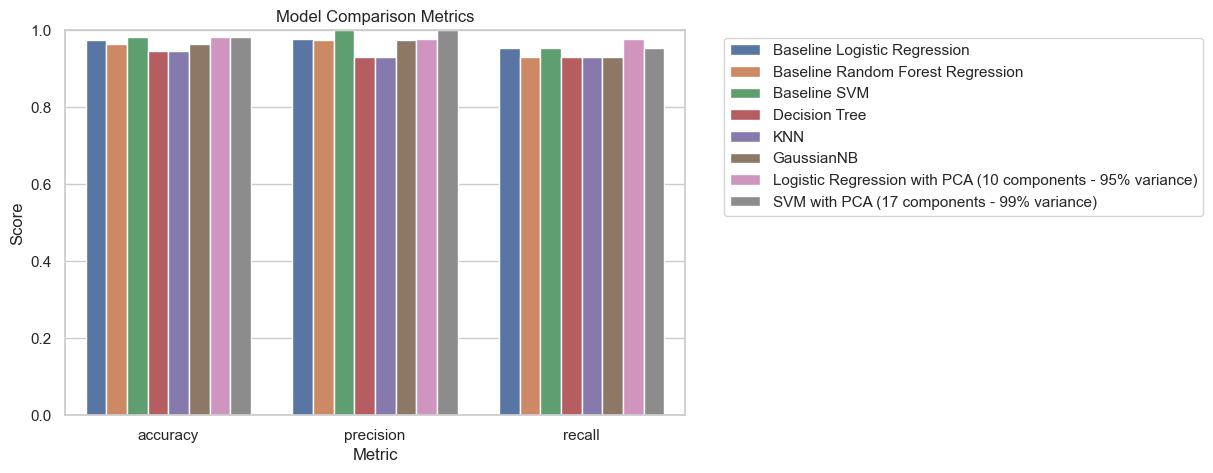

In [28]:
sns.set(style="whitegrid")

df_melt = results_df.melt(id_vars='model', 
                          value_vars=['accuracy','precision','recall'],
                          var_name='Metric', value_name='Score')

plt.figure(figsize=(8,5))
sns.barplot(data=df_melt, x='Metric', y='Score', hue='model')
plt.ylim(0,1)
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()
plt.show()

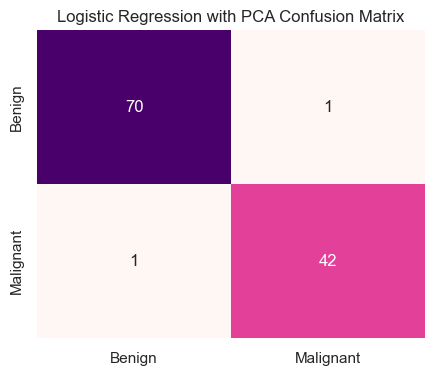

In [33]:
cm = confusion_matrix(y_test, pred_pca)

plt.figure(figsize=(5,4))
plt.title("Logistic Regression with PCA Confusion Matrix")
sns.heatmap(
cm,
annot=True,
fmt="d",
cmap="RdPu",  
cbar=False,
xticklabels=["Benign", "Malignant"],
yticklabels=["Benign", "Malignant"])
plt.show()

* 70 benign tumors were correctly classified as benign.
* 42 malignant tumors were correctly detected.
* 1 benign tumor was predicted as malignant.
* 1 malignant tumor was predicted as benign. → This is the dangerous mistake.

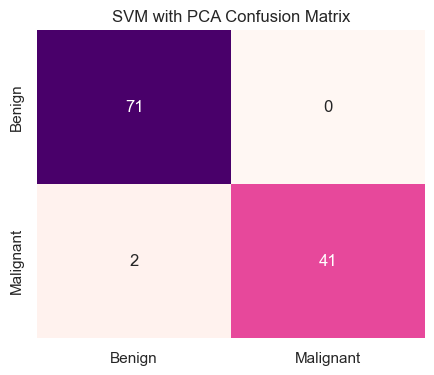

In [32]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
plt.title("SVM with PCA Confusion Matrix")
sns.heatmap(
cm,
annot=True,
fmt="d",
cmap="RdPu",  
cbar=False,
xticklabels=["Benign", "Malignant"],
yticklabels=["Benign", "Malignant"])
plt.show()

* 71 benign tumors were correctly classified as benign.
* 41 malignant tumors were correctly detected.
* 0 benign tumor was predicted as malignant.
* 2 malignant tumor was predicted as benign. → One more than the Logistic Regression model

For all the above reasons we choose the **Logistic Regression with PCA model** for our predictions.